In [1]:
import requests

r_train = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a")# 获取数据集
r_val=requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t")# 获取数据集

In [2]:
from io import BytesIO
from sklearn.datasets import load_svmlight_file

n_features=123

X_train, y_train = load_svmlight_file(BytesIO(r_train.content), n_features)# 读取实验数据
X_train = X_train.toarray()# 转换成arry

X_val, y_val = load_svmlight_file(BytesIO(r_val.content), n_features)# 读取实验数据
X_val = X_val.toarray()# 转换成arry

In [3]:
import numpy

n_train_samples, n_train_features = X_train.shape# 计算有多少个samples和feature
X_train = numpy.column_stack((X_train, numpy.ones((n_train_samples, 1))))# 再加上一列
y_train = y_train.reshape((-1, 1))# 将y转置，换成一列的
n_val_samples, n_val_features = X_val.shape# 计算有多少个samples和feature
X_val = numpy.column_stack((X_val, numpy.ones((n_val_samples, 1))))# 再加上一列
y_val = y_val.reshape((-1, 1))# 将y转置，换成一列的

#将结果变为1和0
for i in range(y_train.shape[0]):
    y_train[i][0]=(y_train[i][0]+1)/2

for i in range(y_val.shape[0]):
    y_val[i][0]=(y_val[i][0]+1)/2
    
# print(X_train)
# print(y_train)
# print(X_val)
# print(y_val)

In [4]:
learning_rate = 0.01
max_epoch = 300
batch_size=1000

losses_train = []
losses_val = []

In [5]:
# 不同的初始化参数的方式# 产生的w为n_features+1行，1列的列向量
#w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
# w = numpy.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution
# print(w)

In [6]:
# Sigmoid函数
def sigmoid(z):
    return 1/(1+numpy.exp(-z))

In [7]:
#随机产生batch的函数
def sample(X, y, batch_size):
    batch=random.sample(range(0,n_train_samples),batch_size) 
    random_row = numpy.random.randint(len(y) - batch_size)
    
    # get partial sample
    X_batch = X[batch[0]]
    y_batch = y[batch[0]]
    random_row += 1
    for i in range(batch_size - 1):
        X_batch = numpy.vstack((X_batch,X[batch[i]]))
        y_batch = numpy.vstack((y_batch,y[batch[i]]))
    
    return X_batch, y_batch

In [8]:
import random

'''#oringin random method
#batch=random.sample(range(0,n_train_samples),batch_size) 
# print("batch:",batch)
# gradient=numpy.zeros((n_features + 1, 1))
'''

for epoch in range(max_epoch):
    X_batch, y_batch = sample(X_train, y_train, batch_size)# 取batch
    G=numpy.dot(X_batch.transpose(),(sigmoid(numpy.dot(X_batch,w))-y_batch))/batch_size
    w=w-learning_rate*G
    '''#oringinal method
    for i in batch:
        z_train=numpy.dot(X_train[i],w)
        diff=sigmoid(numpy.dot(X_train[i],w))-y_train[i]
        gradient+=diff*X_train[i].reshape(-1,1)
    w=w-learning_rate*gradient/batch_size
    '''
    
    # 计算测试集的loss
    z_predict = numpy.dot(X_val, w)
    loss_val=-(numpy.dot(y_val.transpose(),numpy.log(sigmoid(z_predict)))+numpy.dot((1-y_val.transpose()),numpy.log(1-sigmoid(z_predict))))/y_val.shape[0]
    losses_val.append(loss_val[0])
    
print("losses_val:\n",losses_val)

losses_val:
 [array([4.91479352]), array([4.87217386]), array([4.8309292]), array([4.78835899]), array([4.74611954]), array([4.70541789]), array([4.66372672]), array([4.6227828]), array([4.580065]), array([4.53914806]), array([4.49806506]), array([4.45716629]), array([4.41590221]), array([4.374936]), array([4.3333367]), array([4.2918333]), array([4.24840842]), array([4.20850085]), array([4.16813269]), array([4.12682446]), array([4.08618139]), array([4.0448978]), array([4.00421339]), array([3.96290839]), array([3.9203523]), array([3.87931951]), array([3.83926238]), array([3.7977526]), array([3.75684068]), array([3.71547534]), array([3.67382134]), array([3.63163209]), array([3.5915533]), array([3.55209996]), array([3.51178981]), array([3.46979313]), array([3.42969859]), array([3.38804213]), array([3.34741986]), array([3.30781841]), array([3.2676214]), array([3.22701482]), array([3.18748923]), array([3.14732685]), array([3.10681689]), array([3.06663827]), array([3.0283422]), array([2.9904

Text(0.5,1,'The graph of absolute diff value varing with the number of iterations')

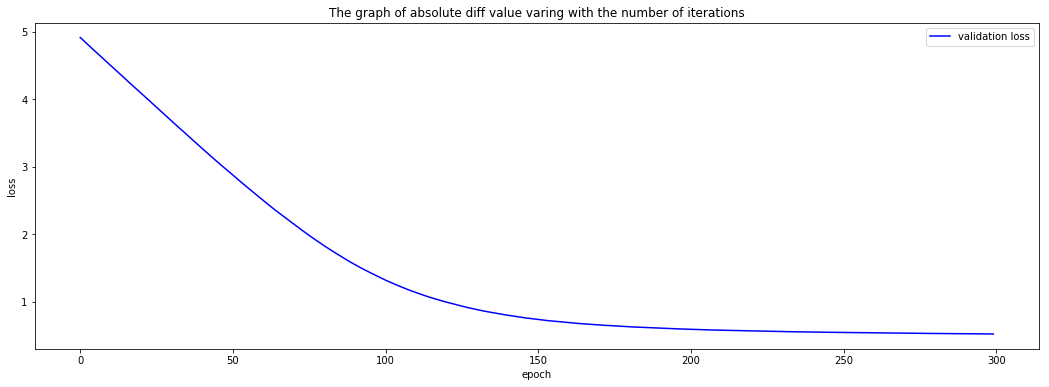

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")